<a href="https://colab.research.google.com/github/egaraev/robocar/blob/main/Object_detect_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
model_dir = '/content/drive/MyDrive/Training'
#!rm -rf '{model_dir}'
#os.makedirs(model_dir, exist_ok=True)
!ls -ltra '{model_dir}'/..

Mounted at /content/drive
total 7586
-rw------- 1 root root 4088763 May 26  2020  9781789956481_Code.zip
-rw------- 1 root root     172 Dec  3  2020 'Copy of LOST AT SEA.gsheet'
-rw------- 1 root root  164354 Dec 10  2020  calls-20201210231303.xml
-rw------- 1 root root 1778767 Dec 10  2020  sms-20201210231303.xml
drwx------ 2 root root    4096 Feb 21  2021  Tasker
-rw------- 1 root root   77886 May  3  2022  Passport.jpg
-rw------- 1 root root 1033614 Jul 22  2022  attachment.zip
-rw------- 1 root root  610271 Aug  5  2022  d9af297e-e15d-4fea-81d0-7a8929a75812.zip
drwx------ 2 root root    4096 Apr  7 21:01  Training
drwx------ 2 root root    4096 Apr  7 21:04 'Colab Notebooks'


In [1]:
!pip install tensorflow=="2.6.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.4/458.4 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 90.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30692 sha256=59867fbda1a9e41a14d8d0990fb5ce84d48ff0a5637ca15298f2b241c91d43f8
  Stored in directory: /root/.cache/pip/wheels/3a/ce/7a/27094f689461801c934296d07078773603663dfcaca63bb064
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4845 sha256=18915869f362f680d0a9087fd2794191b

In [3]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3703, done.
remote: Counting objects: 100% (3703/3703), done.
remote: Compressing objects: 100% (2805/2805), done.
remote: Total 3703 (delta 1055), reused 1832 (delta 849), pack-reused 0
Receiving objects: 100% (3703/3703), 48.70 MiB | 21.95 MiB/s, done.
Resolving deltas: 100% (1055/1055), done.


In [4]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 KB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
optax 0.1.4 requires typing-extensions>=3.10.0, but you have typing-extensions 3.7.4.3 which is incompatible.
librosa 0.10.0.post2 requires typing-extensions>=4.1.1, but you have typing-extensions 3.7.4.3 which is incompatible.
flax 0.6.8 requires typing-extensions>=4.1.1, but you have typing-extensions 3.7.4.3 which is incompatible.
chex 0.1.7 requires typing-extensions>=4.2.0; python_version < "3.11", but you have typing-extensions 3.7.4.3 which is incompatible.
bokeh 2.4.3 requires typing-extensions>=3.10.0, but you have typing-extensions 3.7.4.3 which is incompatible.
arviz 0.15.1 requires typing-extensions>=4.1.0, but you have typing-extensions 3.7.4.3 which is incompatible.


In [5]:
#run model builder test
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

2023-04-10 08:01:59.164899: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-10 08:02:00.513866: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
Running tests under Python 3.9.16: /usr/bin/pyth

In [8]:
import os
repo_url = 'https://github.com/egaraev/robocar'

%cd /content

repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))

!git clone {repo_url}
%cd {repo_dir_path}

print('Pull it so that we have the latest code/data')
!git pull

/content
Cloning into 'robocar'...
remote: Enumerating objects: 12491, done.
remote: Counting objects: 100% (984/984), done.
remote: Compressing objects: 100% (563/563), done.
remote: Total 12491 (delta 453), reused 916 (delta 390), pack-reused 11507
Receiving objects: 100% (12491/12491), 432.89 MiB | 25.04 MiB/s, done.
Resolving deltas: 100% (516/516), done.
Updating files: 100% (11810/11810), done.
/content/robocar
Pull it so that we have the latest code/data
Already up to date.


In [9]:
%cd {repo_dir_path}/models/object_detection

# Convert train folder annotation xml files to a single csv file,
# generate the `label_map.pbtxt` file to `data/` directory as well.
!python code/xml_to_csv.py -i data/images/train -o data/annotations/train_labels.csv -l data/annotations

# Convert test folder annotation xml files to a single csv.
!python code/xml_to_csv.py -i data/images/test -o data/annotations/test_labels.csv

# Generate `train.record`
!python code/generate_tfrecord.py --csv_input=data/annotations/train_labels.csv --output_path=data/annotations/train.record --img_path=data/images/train --label_map data/annotations/label_map.pbtxt

# Generate `test.record`
!python code/generate_tfrecord.py --csv_input=data/annotations/test_labels.csv --output_path=data/annotations/test.record --img_path=data/images/test --label_map data/annotations/label_map.pbtxt

/content/robocar/models/object_detection
Successfully converted xml to csv.
Generate `data/annotations/label_map.pbtxt`
Successfully converted xml to csv.
2023-04-10 08:08:24.557862: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-10 08:08:25.792896: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Successfully created the TFRecords: /content/robocar/models/object_detection/data/annotations/train.record
2023-04-10 08:08:29.665037: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
test_record_fname = repo_dir_path + '/models/object_detection/data/annotations/test.record'
train_record_fname = repo_dir_path + '/models/object_detection/data/annotations/train.record'
label_map_pbtxt_fname = repo_dir_path + '/models/object_detection/data/annotations/label_map.pbtxt'

In [11]:
!cat data/annotations/test_labels.csv

filename,width,height,class,xmin,ymin,xmax,ymax
20230407_181240.jpg,640,480,person,22,313,67,378
20230407_181240.jpg,640,480,round,87,292,124,360
20230407_181240.jpg,640,480,red light,165,278,194,358
20230407_181240.jpg,640,480,limit 30,209,285,242,353
20230407_181240.jpg,640,480,traffic light sign,261,283,290,348
20230407_181240.jpg,640,480,stop,353,300,392,373
20230407_181240.jpg,640,480,limit 50,433,303,466,378
20230407_181240.jpg,640,480,green light,490,307,525,393
20230407_181240.jpg,640,480,pedestrian sign,539,331,578,416
20230407_181240.jpg,640,480,second person,305,292,345,357
20230407_181019.jpg,640,480,round,16,292,56,366
20230407_181019.jpg,640,480,limit 30,85,284,121,357
20230407_181019.jpg,640,480,green light,168,276,202,353
20230407_181019.jpg,640,480,limit 50,217,283,250,351
20230407_181019.jpg,640,480,person,262,290,302,354
20230407_181019.jpg,640,480,traffic light sign,314,291,347,355
20230407_181019.jpg,640,480,red light,361,283,393,357
20230407_181019.jpg,640,480,sto

In [70]:
train_record_path = train_record_fname
test_record_path = test_record_fname
labelmap_path = label_map_pbtxt_fname

In [71]:
batch_size = 4
num_steps = 2000 #Must be 8000
num_eval_steps = 1000 #Must be 1000

In [72]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
!tar -xf efficientdet_d0_coco17_tpu-32.tar.gz

--2023-04-10 11:25:36--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.148.128, 2607:f8b0:4001:c54::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.148.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30736482 (29M) [application/x-tar]
Saving to: ‘efficientdet_d0_coco17_tpu-32.tar.gz.1’

efficientdet_d0_coc 100%[===================>]  29.31M  39.7MB/s    in 0.7s    

2023-04-10 11:25:37 (39.7 MB/s) - ‘efficientdet_d0_coco17_tpu-32.tar.gz.1’ saved [30736482/30736482]



In [73]:
fine_tune_checkpoint = 'efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0'

In [74]:
!wget https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_efficientdet_d0_512x512_coco17_tpu-8.config


--2023-04-10 11:25:42--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_efficientdet_d0_512x512_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4630 (4.5K) [text/plain]
Saving to: ‘ssd_efficientdet_d0_512x512_coco17_tpu-8.config.1’

ssd_efficientdet_d0 100%[===================>]   4.52K  --.-KB/s    in 0s      

2023-04-10 11:25:42 (44.9 MB/s) - ‘ssd_efficientdet_d0_512x512_coco17_tpu-8.config.1’ saved [4630/4630]



In [75]:
base_config_path = 'ssd_efficientdet_d0_512x512_coco17_tpu-8.config'

In [76]:
# edit configuration file 

import re

with open(base_config_path) as f:
    config = f.read()

with open('model_config.config', 'w') as f:
  
  # Set labelmap path
  config = re.sub('label_map_path: ".*?"', 
             'label_map_path: "{}"'.format(labelmap_path), config)
  
  # Set fine_tune_checkpoint path
  config = re.sub('fine_tune_checkpoint: ".*?"',
                  'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), config)
  
  # Set train tf-record file path
  config = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 
                  'input_path: "{}"'.format(train_record_path), config)
  
  # Set test tf-record file path
  config = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 
                  'input_path: "{}"'.format(test_record_path), config)
  
  # Set number of classes.
  config = re.sub('num_classes: [0-9]+',
                  'num_classes: {}'.format(10), config)
  
  # Set batch size
  config = re.sub('batch_size: [0-9]+',
                  'batch_size: {}'.format(batch_size), config)
  
  # Set training steps
  config = re.sub('num_steps: [0-9]+',
                  'num_steps: {}'.format(num_steps), config)
  
  # Set fine-tune checkpoint type to detection
  config = re.sub('fine_tune_checkpoint_type: "classification"', 
             'fine_tune_checkpoint_type: "{}"'.format('detection'), config)
  
  f.write(config)

In [77]:
%cat model_config.config

 # SSD with EfficientNet-b0 + BiFPN feature extractor,
# shared box predictor and focal loss (a.k.a EfficientDet-d0).
# See EfficientDet, Tan et al, https://arxiv.org/abs/1911.09070
# See Lin et al, https://arxiv.org/abs/1708.02002
# Trained on COCO, initialized from an EfficientNet-b0 checkpoint.
#
# Train on TPU-8

model {
  ssd {
    inplace_batchnorm_update: true
    freeze_batchnorm: false
    num_classes: 10
    add_background_class: false
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
        use_matmul_gather: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    encode_background_as_zeros: true
    anchor_generator {
      

In [78]:
pipeline_config_path = 'model_config.config'

In [79]:
!python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_config_path} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1 \
    --num_eval_steps={num_eval_steps}

2023-04-10 11:26:11.901200: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
W0410 11:26:16.388490 140714277975872 cross_device_ops.py:1387] There are non-GPU devices in `tf.distribute.Strategy`, not using nccl allreduce.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0410 11:26:16.423171 140714277975872 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localh

In [80]:
output_directory = 'inference_graph'

!python /content/models/research/object_detection/exporter_main_v2.py \
    --trained_checkpoint_dir {model_dir} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_config_path}

2023-04-10 16:23:22.486771: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
I0410 16:23:28.867858 140089287313216 ssd_efficientnet_bifpn_feature_extractor.py:150] EfficientDet EfficientNet backbone version: efficientnet-b0
I0410 16:23:28.868162 140089287313216 ssd_efficientnet_bifpn_feature_extractor.py:152] EfficientDet BiFPN num filters: 64
I0410 16:23:28.868299 140089287313216 ssd_efficientnet_bifpn_feature_extractor.py:153] Effi

In [42]:
!pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.2 which is incompatible.
optax 0.1.4 requires typing-extensions>=3.10.0, but you have typing-extensions 3.7.4.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.2 which is incompatible.
librosa 0.10.0.post2 requires typing-extensions>=4.1.1, but you have typing-extensions 3.7.4.3 which is incompatible.
flax 0.6.8 requires typing-extensions>=4.1.1, but you have typing-e

In [81]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

%matplotlib inline

In [82]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [83]:
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)

In [84]:
!pwd


/content/robocar/models/object_detection


In [85]:
import os

path = '/content/robocar/models/object_detection/efficientdet_d0_coco17_tpu-32'
if os.path.exists(path):
    print("Directory contents:")
    for filename in os.listdir(path):
        print(filename)
else:
    print("Directory does not exist")

Directory contents:
pipeline.config
checkpoint
saved_model


In [90]:
tf.keras.backend.clear_session()
#model = tf.saved_model.load('/content/robocar/models/object_detection/efficientdet_d0_coco17_tpu-32/saved_model')
model = tf.saved_model.load('/content/robocar/models/object_detection/inference_graph/saved_model')


In [91]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

Running inferences on ['/content/robocar/models/object_detection/data/images/test/20230407_181149.jpg', '/content/robocar/models/object_detection/data/images/test/20230407_180957.jpg', '/content/robocar/models/object_detection/data/images/test/20230407_181240.jpg', '/content/robocar/models/object_detection/data/images/test/20230407_181019.jpg', '/content/robocar/models/object_detection/data/images/test/20230407_181100.jpg']


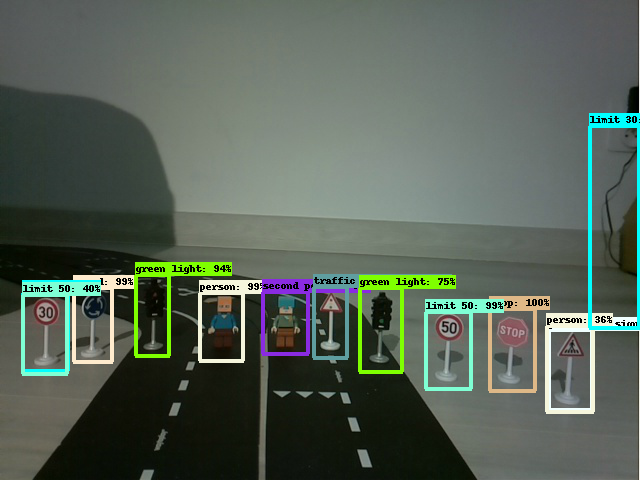

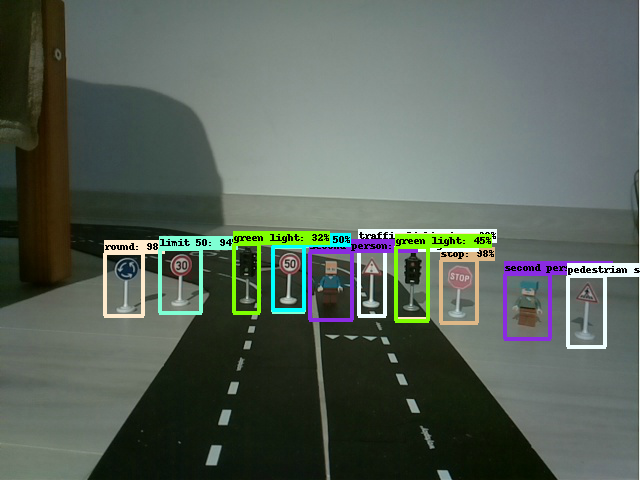

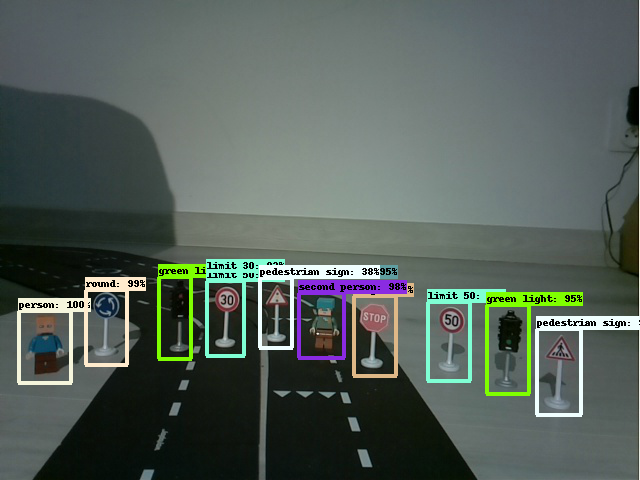

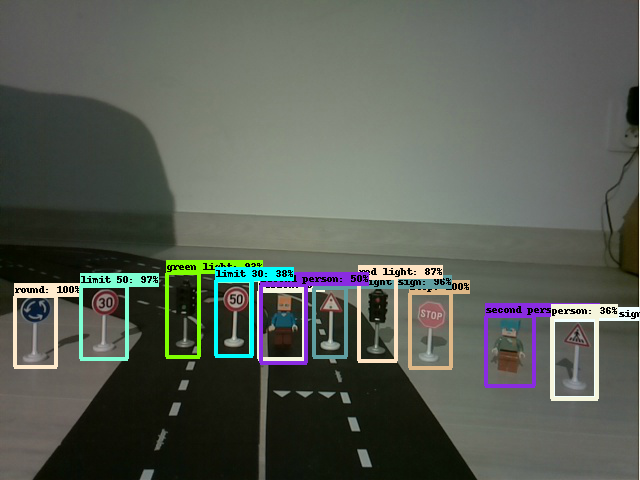

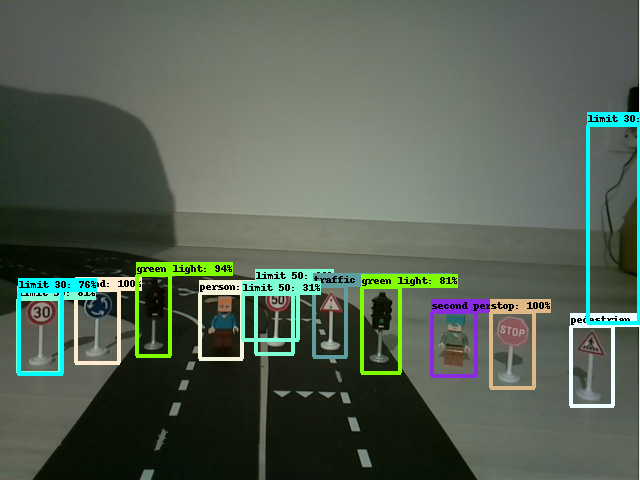

In [93]:
# Load test images
TEST_IMAGE_PATHS = ['/content/robocar/models/object_detection/data/images/test/20230407_181149.jpg',
                    '/content/robocar/models/object_detection/data/images/test/20230407_180957.jpg',
                    '/content/robocar/models/object_detection/data/images/test/20230407_181240.jpg',
                    '/content/robocar/models/object_detection/data/images/test/20230407_181019.jpg',
                    '/content/robocar/models/object_detection/data/images/test/20230407_181100.jpg']

print("Running inferences on {}".format(TEST_IMAGE_PATHS))

for image_path in TEST_IMAGE_PATHS:
  image_np = load_image_into_numpy_array(image_path)
  output_dict = run_inference_for_single_image(model, image_np)
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=4,
      min_score_thresh=0.3)
  display(Image.fromarray(image_np))

In [89]:
!cp -R /content/robocar/ /content/drive/MyDrive/